# PRODIGY INFOTECH  INTERNSHIP
PROJECT ONE
(TASK NAME: TWITTER SENTIMENT ANALYSIS)

In [ ]:
STEP 1:
1: Import needed dependencies
2: Load the dataset
3: Display a sample of the dataset
4: Explore the dataset's size and structure
5: Check for & Handle missing values
6: Check for & Handle data type inconsistency
7: Check for & Handle duplicates

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
import plotly.express as px

warnings.filterwarnings('ignore')

In [4]:

twitter = pd.read_csv(r'D:\8samaster\CodSoft\twitter_training.csv')
twitter.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
# datatype info
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
print(twitter.columns)


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [7]:
twitter.shape


(74681, 4)

In [ ]:
The dataset contains 4 features with 74,681 records
There are no missing values in the dataset EXCEPT in the last column - (i.e. the "Tweet Content" feature)
This would be handled in the next section


# Check for & Handle missing values

In [8]:
twitter.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
twitter.sample(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
973,2573,Borderlands,Negative,That cricket was the worst fennel fennel I've ...
41711,1557,Battlefield,Negative,@EAHelp i cant seem to get online to play @Bat...
69134,3842,Cyberpunk2077,Irrelevant,"Wife: How did You do Last<unk>. Me: ""Bombed..."
24617,4626,Google,Negative,Why Google sucks: Google regulates undocumente...
9501,12835,Xbox(Xseries),Positive,the Amazing overview book of gaming the new Xb...


# Explore the dataset's structure, size and contents

In [ ]:
Rename the dataset columns for comprehensability
Check the shape of the dataset
Check general information about the structure of the dataset

In [11]:
twitter.rename(columns={'2401':'Tweet ID', 'Borderlands':'Entity', 'Positive':'Sentiment', 'im getting on borderlands and i will murder you all ,': 'Tweet Content'}, inplace=True)

#Check if it has been properly renamed
twitter.sample(5)

,Tweet ID,Entity,Sentiment,Tweet Content
66027,6907,johnson&johnson,Positive,"Johnson & Johnson Beats Q1 Estimates, Raises D..."
31889,7474,LeagueOfLegends,Positive,zoe is totally healthy and does not deserve th...
57140,11402,TomClancysRainbowSix,Negative,Can't seem to connect in any ranked matche reg...
19770,12585,WorldOfCraft,Negative,My first run as a jockey and it wasn't smooth.
488,2482,Borderlands,Neutral,Tales over the Borderlands Factory.com/product...


In [13]:
# As a check, print specific rows in the "Tweet content" column that contains 1/more missing values
twitter[twitter['Tweet Content'].isnull()].sample(5)

,Tweet ID,Entity,Sentiment,Tweet Content
14556,2894,Dota2,Irrelevant,NaN
23706,4463,Google,Neutral,NaN
11326,13147,Xbox(Xseries),Irrelevant,NaN
63933,7755,MaddenNFL,Negative,NaN
63968,7761,MaddenNFL,Neutral,NaN


# Check for Data type consistency in each column

In [15]:
# Create an empty dataframe to store the results
data_type= pd.DataFrame(columns=['COLUMN NAMES', 'UNIQUE DATA TYPES'])

# Iterate through columns and store unique data types in the new dataframe
for column_name in twitter.columns:
    unique_data_types = twitter[column_name].apply(type).unique()
    data_type = pd.concat([data_type, pd.DataFrame({'COLUMN NAMES': [column_name], 'UNIQUE DATA TYPES': [unique_data_types]})],ignore_index=True)

# Display the resulting table
print(data_type)

    COLUMN NAMES                 UNIQUE DATA TYPES
0       Tweet ID                   [<class 'int'>]
1         Entity                   [<class 'str'>]
2      Sentiment                   [<class 'str'>]
3  Tweet Content  [<class 'str'>, <class 'float'>]


The dataset features contains unique data types
Hence, there would not be need for type casting

# Check for & Handle duplicates

In [17]:
#Check the number of duplicate entries in the dataset
duplicates_data = twitter[twitter.duplicated()]

print(f"There are {len(duplicates_data)} duplicates rows in the dataset")

There are 2700 duplicates rows in the dataset


In [18]:
#Delete the duplicate entries 
twitter=twitter.drop_duplicates(keep='first')

#Check the number records in the resulting datset
twitter.shape

(71981, 4)

In [19]:
#Confirm that there are no more duplicate entries the dataset
print(f"There are {len(twitter[twitter.duplicated()])} duplicates rows in the dataset")

There are 0 duplicates rows in the dataset


In [20]:
data_unique= pd.DataFrame(columns=['COLUMN NAMES', 'UNIQUE DATA'])
for column_name in twitter.columns:
    unique_data = twitter[column_name].nunique()
    data_unique = pd.concat([data_unique, pd.DataFrame({'COLUMN NAMES': [column_name], 'UNIQUE DATA': [unique_data]})],ignore_index=True)
print(data_unique)

    COLUMN NAMES UNIQUE DATA
0       Tweet ID       12447
1         Entity          32
2      Sentiment           4
3  Tweet Content       69490


Going further:
The Sentiment column ought to contain just three unique values (Positive, Negative & Neutral) based on the dataset metadata. I will handle this in the next section

There are 32 unique brands/topics. However, there would be need to visualize their distribution

# Handle features with inconsistent unique fields

In [21]:
#Print out the unique values in the sentiment column
twitter['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [22]:
#Handle the inconsistency
twitter['Sentiment'].replace({'Irrelevant':'Neutral'}, inplace=True)

#Check
twitter['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [23]:
#First, let's get the unique values within the target feature

SentimentDF = pd.DataFrame(columns=['Sentiment', 'COUNT'])

for i in twitter['Sentiment'].unique():
    num = len(twitter[twitter['Sentiment']==i])
    SentimentDF = pd.concat([SentimentDF, pd.DataFrame({'Sentiment':[i], 'COUNT':[num]})], ignore_index=True)
    
SentimentDF.sort_values(by='COUNT', ascending=False, inplace=True)

SentimentDF

,Sentiment,COUNT
1,Neutral,30384
2,Negative,21787
0,Positive,19810


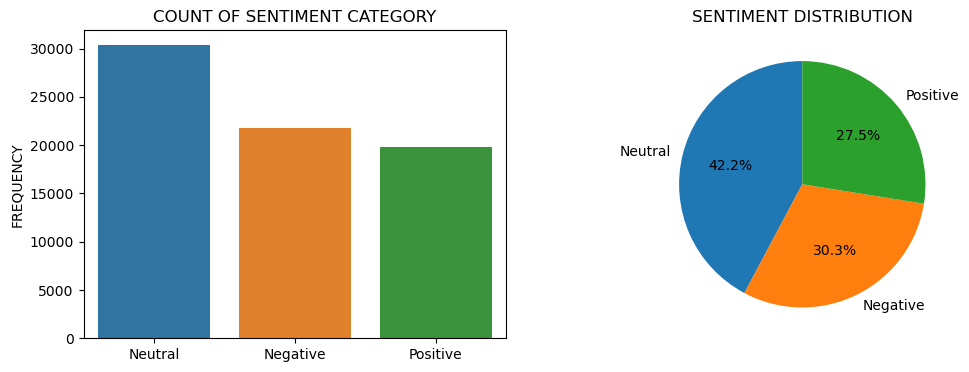

In [25]:
# Bar plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='Sentiment', y='COUNT', data=SentimentDF, order=SentimentDF['Sentiment'])
plt.title("COUNT OF SENTIMENT CATEGORY")
plt.xlabel("")
plt.ylabel("FREQUENCY")

# Pie plot
plt.subplot(1, 2, 2)
plt.pie(SentimentDF['COUNT'], labels=SentimentDF['Sentiment'], autopct='%1.1f%%', startangle=90)
plt.title("SENTIMENT DISTRIBUTION")

plt.show()


Most of the sentiments are NEUTRAL
And there is a very close tie between the number of POSITIVE and NEGATIVE features

In [27]:
# First, let's get the unique values within the ENTITY column
pd.set_option('display.max_colwidth', None)
EntityDF = pd.DataFrame(columns=['Entity', 'COUNT'])

for i in twitter['Entity'].unique():
    num = len(twitter[twitter['Entity'] == i])
    EntityDF = pd.concat([EntityDF, pd.DataFrame({'Entity': [i], 'COUNT': [num]})], ignore_index=True)

EntityDF.sort_values(by='COUNT', ascending=False, inplace=True)

EntityDF


,Entity,COUNT
24,TomClancysRainbowSix,2344
19,Verizon,2328
27,MaddenNFL,2324
23,CallOfDuty,2322
15,Microsoft,2319
5,NBA2K,2306
8,WorldOfCraft,2304
13,LeagueOfLegends,2303
30,TomClancysGhostRecon,2301
25,Facebook,2293


# Generate the count of each Tweet user in theTweet ID Column

In [28]:
pd.set_option('display.max_colwidth', None)
TweetID = pd.DataFrame(columns=['ID', 'COUNT'])

for i in twitter['Tweet ID'].unique():
    num = len(twitter[twitter['Tweet ID'] == i])
    TweetID = pd.concat([TweetID, pd.DataFrame({'ID': [i], 'COUNT': [num]})], ignore_index=True)

TweetID.sort_values(by='COUNT', ascending=False, inplace=True)

TweetID.head(5)


,ID,COUNT
6223,5203,6
7895,5727,6
7921,5754,6
7922,5755,6
7923,5756,6


# Entity Vs Positive Sentiment Relationship Visualization

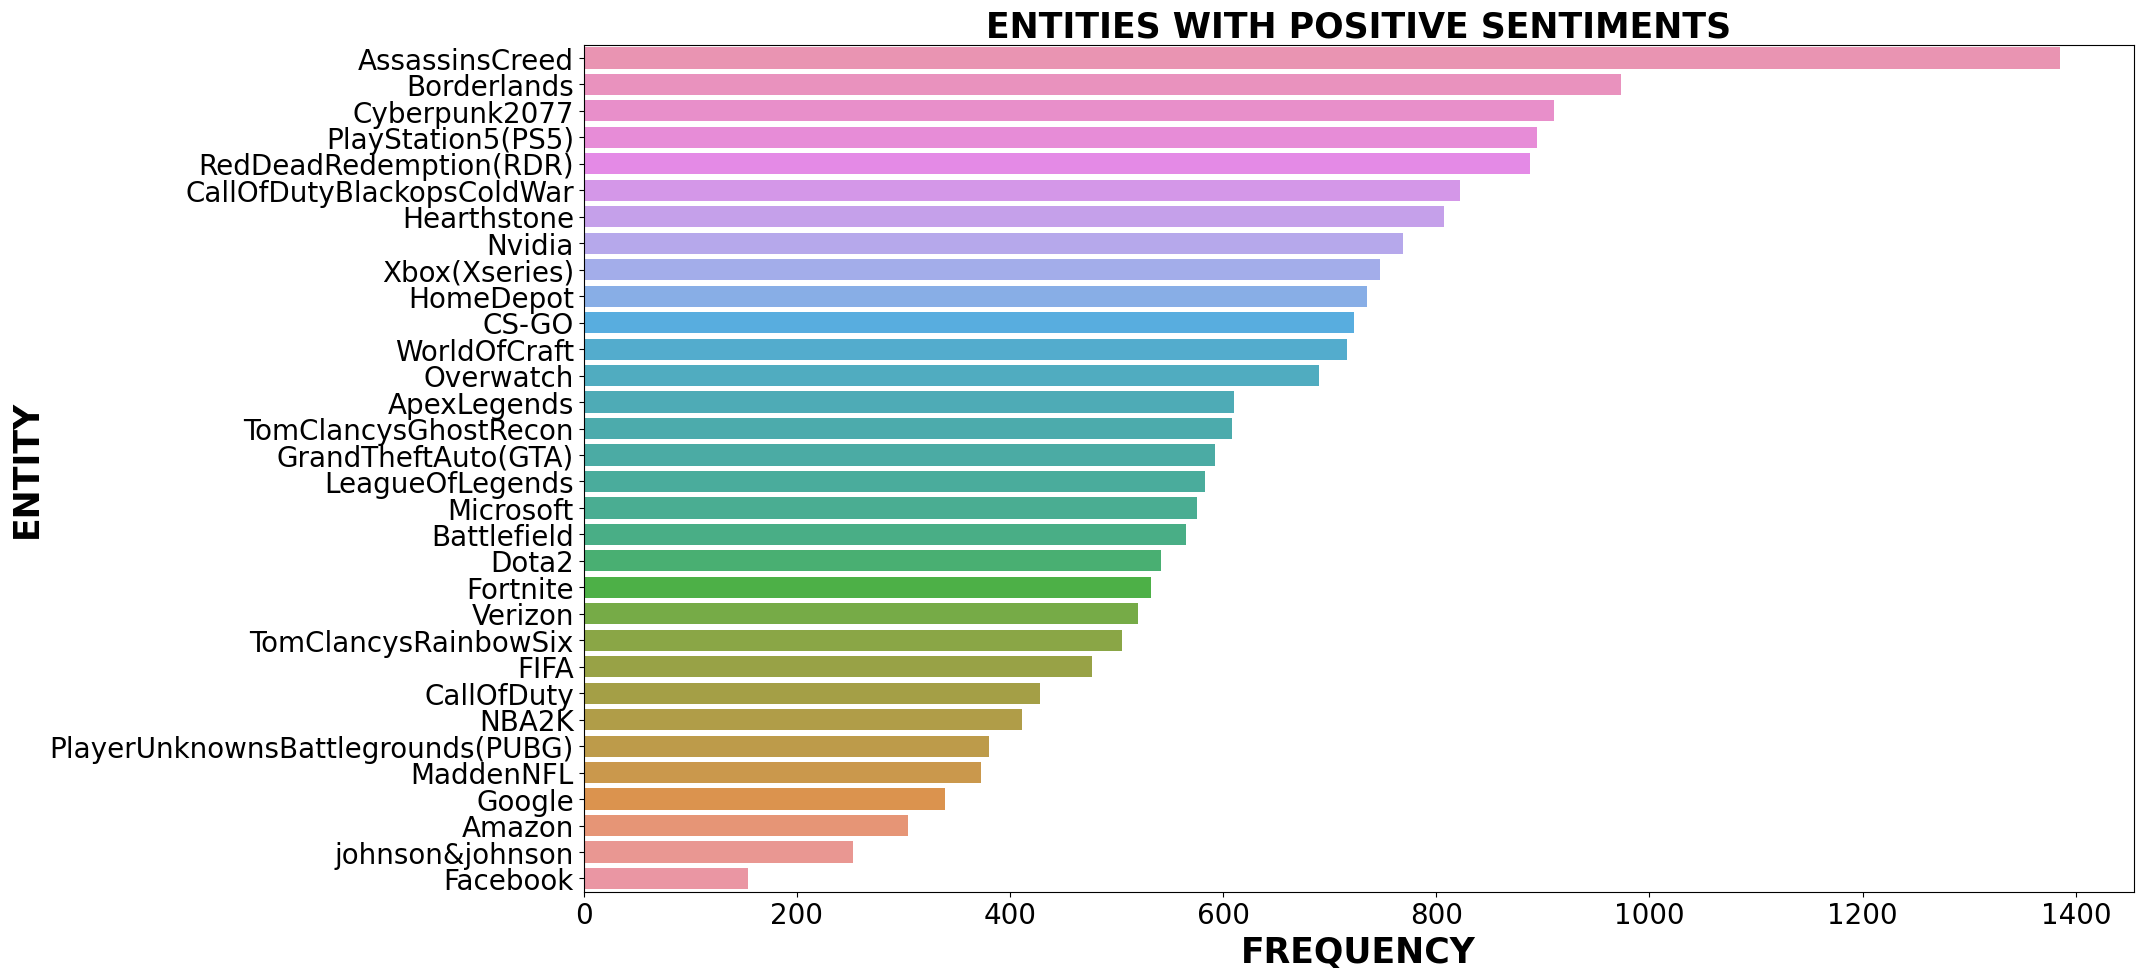

In [29]:
plt.figure(figsize=(20, 11))
sns.countplot(
    y=twitter[twitter['Sentiment'] == 'Positive']['Entity'],
    order=twitter[twitter['Sentiment'] == 'Positive']['Entity'].value_counts().index[::-1]
)
plt.gca().invert_yaxis()

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("FREQUENCY", fontsize=25, fontweight='bold')
plt.ylabel("ENTITY", fontsize=25, fontweight='bold')
plt.title("ENTITIES WITH POSITIVE SENTIMENTS", fontsize=25, fontweight='bold')
plt.show()


The top 5 brands with the most positive feedback from its end users are:
AssassinsCreed
Borderlands
Cyberpunk2077
PlayStattion5(PS5)
RedDeadRedemption(RDR)

# Entity Vs Negative Sentiment Relationship Visualization

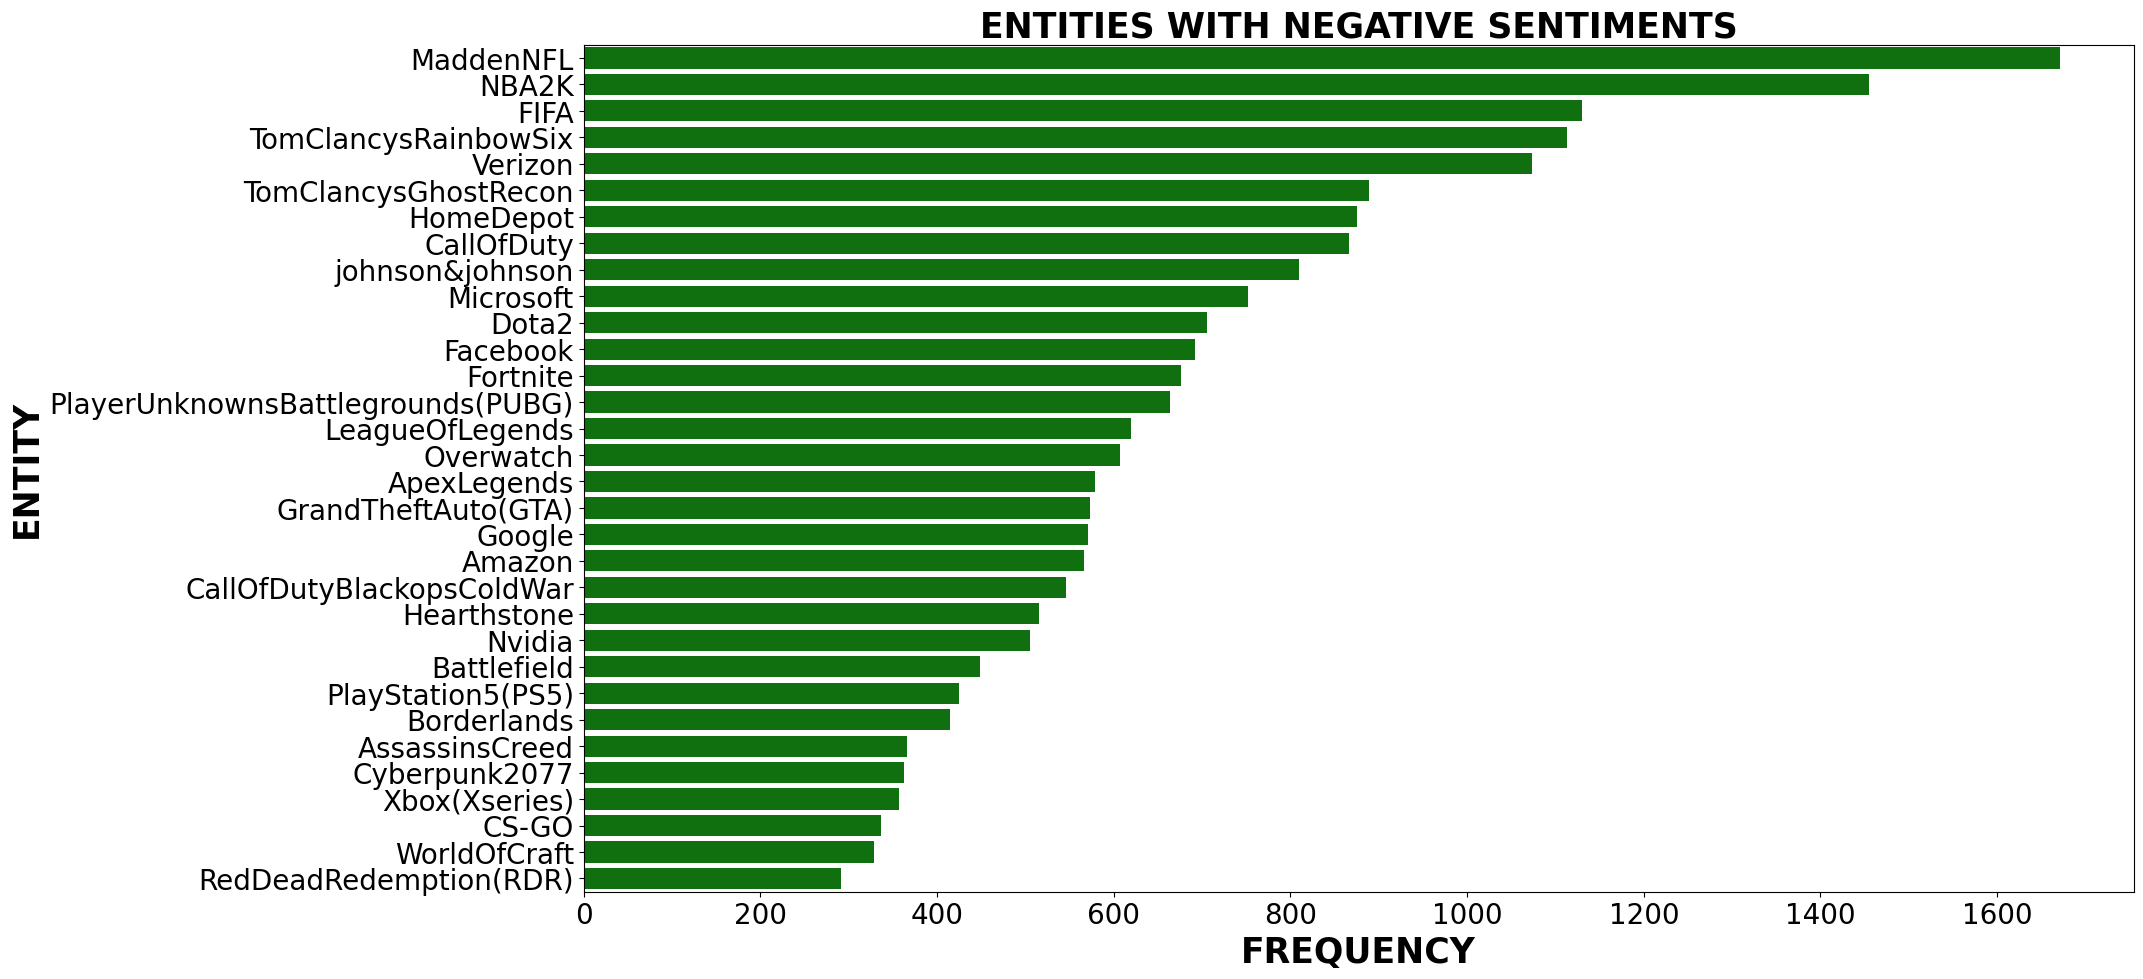

In [33]:
plt.figure(figsize=(20, 11))
sns.countplot(
    y=twitter[twitter['Sentiment'] == 'Negative']['Entity'],
    order=twitter[twitter['Sentiment'] == 'Negative']['Entity'].value_counts().index[::-1],
    color='green'  # Set color to green
)
plt.gca().invert_yaxis()

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("FREQUENCY", fontsize=25, fontweight='bold')
plt.ylabel("ENTITY", fontsize=25, fontweight='bold')
plt.title("ENTITIES WITH NEGATIVE SENTIMENTS", fontsize=25, fontweight='bold')
plt.show()



The top 5 brands with the most negative feedback (i.e. least positive feedback) from its end users are:
MaddenNFL
NBA2K
FIFA
TomClancysRainbowSix
Verizon

# Entity Vs Neutral Sentiment Relationship Visualization

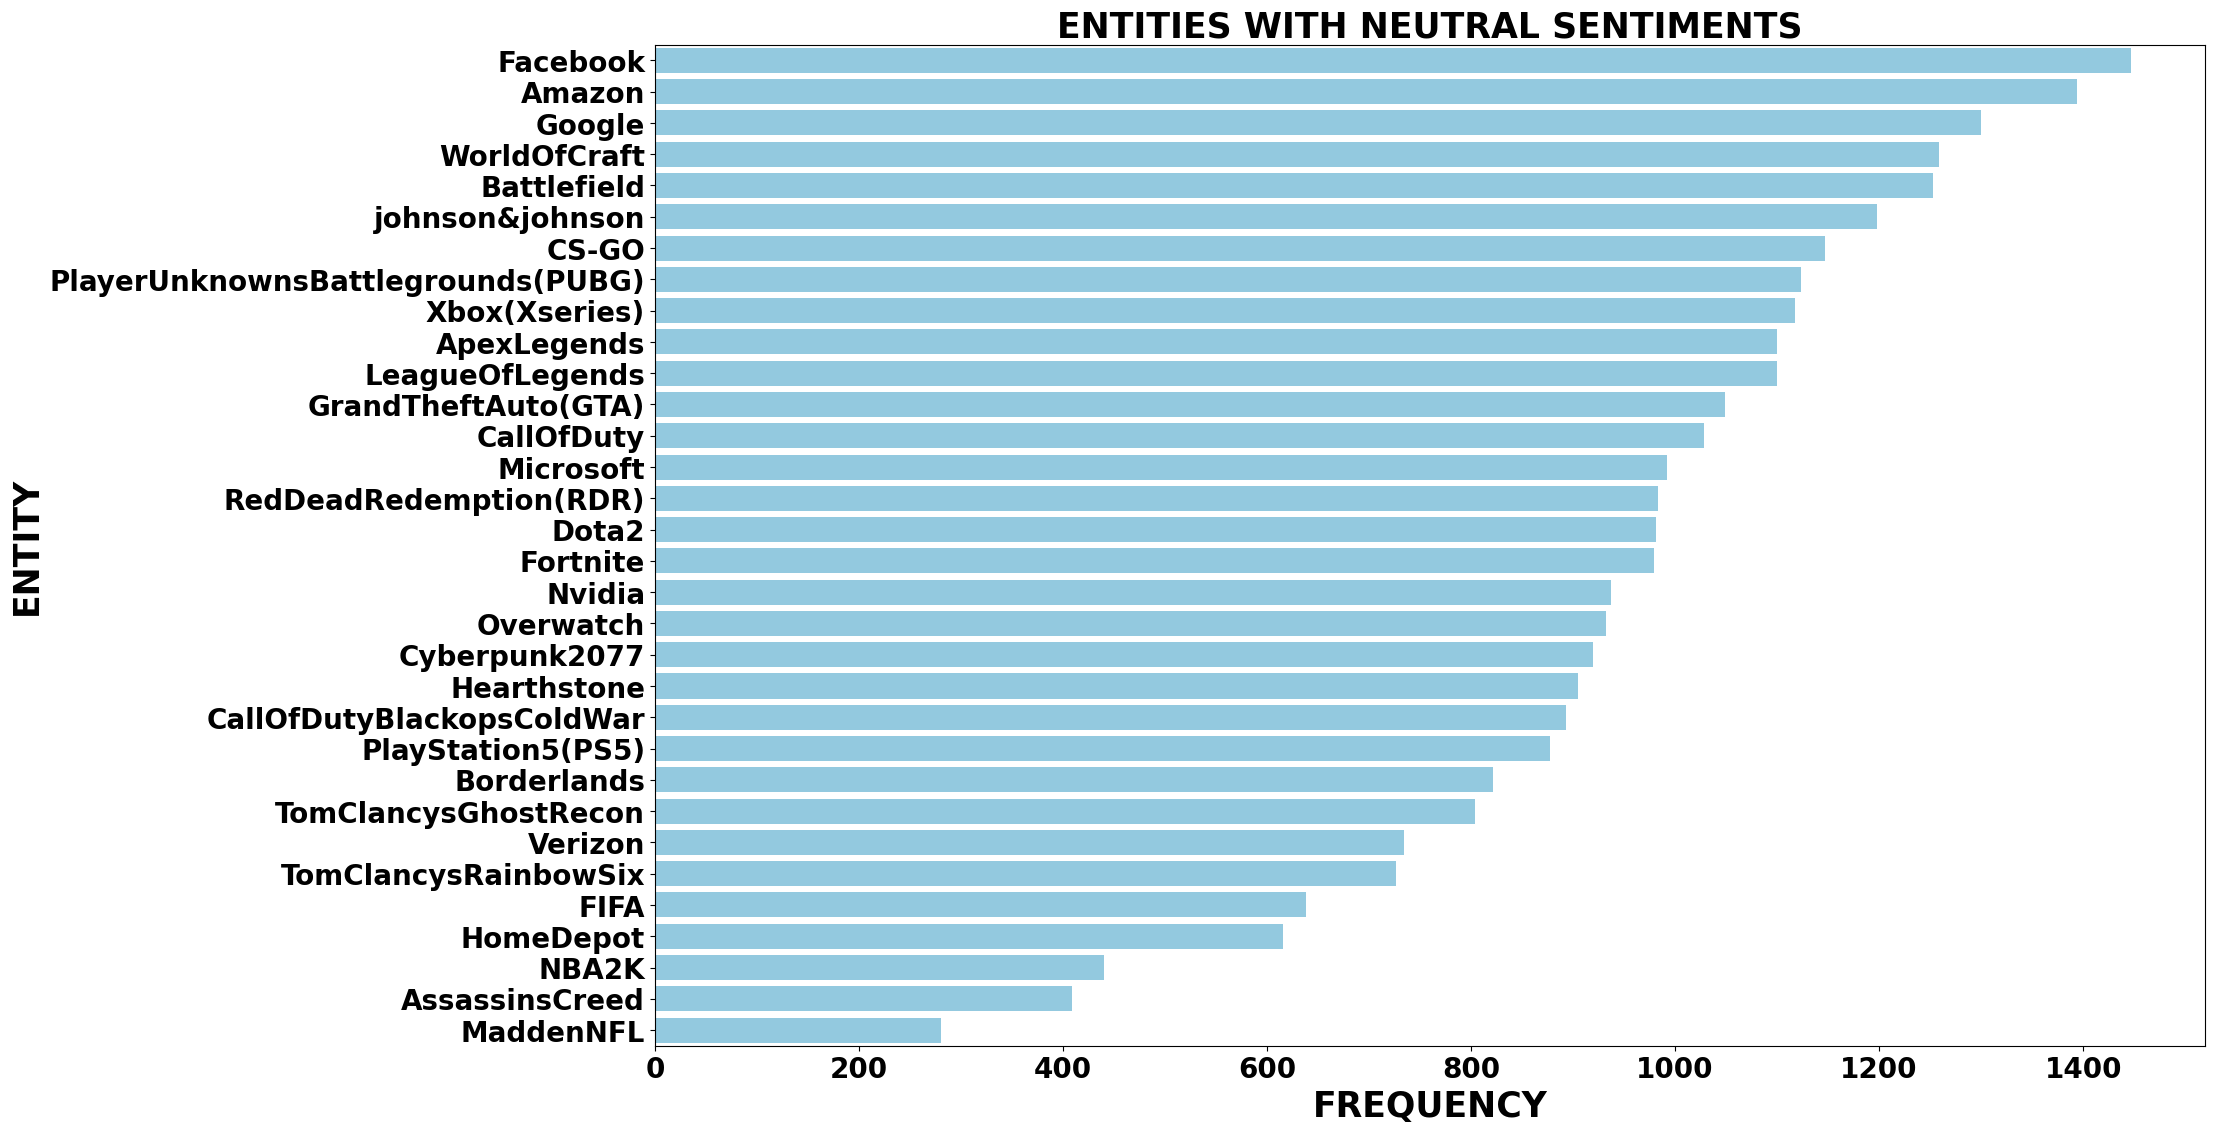

In [32]:
plt.figure(figsize=(20, 13))
sns.countplot(
    y=twitter[twitter['Sentiment'] == 'Neutral']['Entity'],
    order=twitter[twitter['Sentiment'] == 'Neutral']['Entity'].value_counts().index[::-1],
    color='skyblue'  # You can change 'skyblue' to your desired color
)
plt.gca().invert_yaxis()

plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.xlabel("FREQUENCY", fontsize=25, fontweight='bold')
plt.ylabel("ENTITY", fontsize=25, fontweight='bold')
plt.title("ENTITIES WITH NEUTRAL SENTIMENTS", fontsize=25, fontweight='bold')
plt.show()



# Entity feature Vs Postive|Negative Sentiments Relationship

In [37]:
Entity_Sentiment = pd.DataFrame(columns=['Entity', 'Frequency', 'Positive', 'Negative', 'Neutral'])

for i in twitter['Entity'].unique():
    num = len(twitter[twitter['Entity'] == i])
    pst = (twitter[(twitter['Entity'] == i) & (twitter['Sentiment'] == 'Positive')]).shape[0]
    ngt = (twitter[(twitter['Entity'] == i) & (twitter['Sentiment'] == 'Negative')]).shape[0]
    ntr = (twitter[(twitter['Entity'] == i) & (twitter['Sentiment'] == 'Neutral')]).shape[0]
    
    Entity_Sentiment = pd.concat([Entity_Sentiment, pd.DataFrame({'Entity':[i], 'Frequency':[num], 'Positive':[pst], 'Negative':[ngt], 'Neutral':[ntr]})], ignore_index=True)

Entity_Sentiment.sort_values(by='Frequency', ascending=False, inplace=True)

#Print
Entity_Sentiment.head(5)

,Entity,Frequency,Positive,Negative,Neutral
24,TomClancysRainbowSix,2344,505,1113,726
19,Verizon,2328,520,1074,734
27,MaddenNFL,2324,373,1671,280
23,CallOfDuty,2322,428,866,1028
15,Microsoft,2319,575,752,992


<module 'matplotlib.pyplot' from 'C:\\Users\\NIMA\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

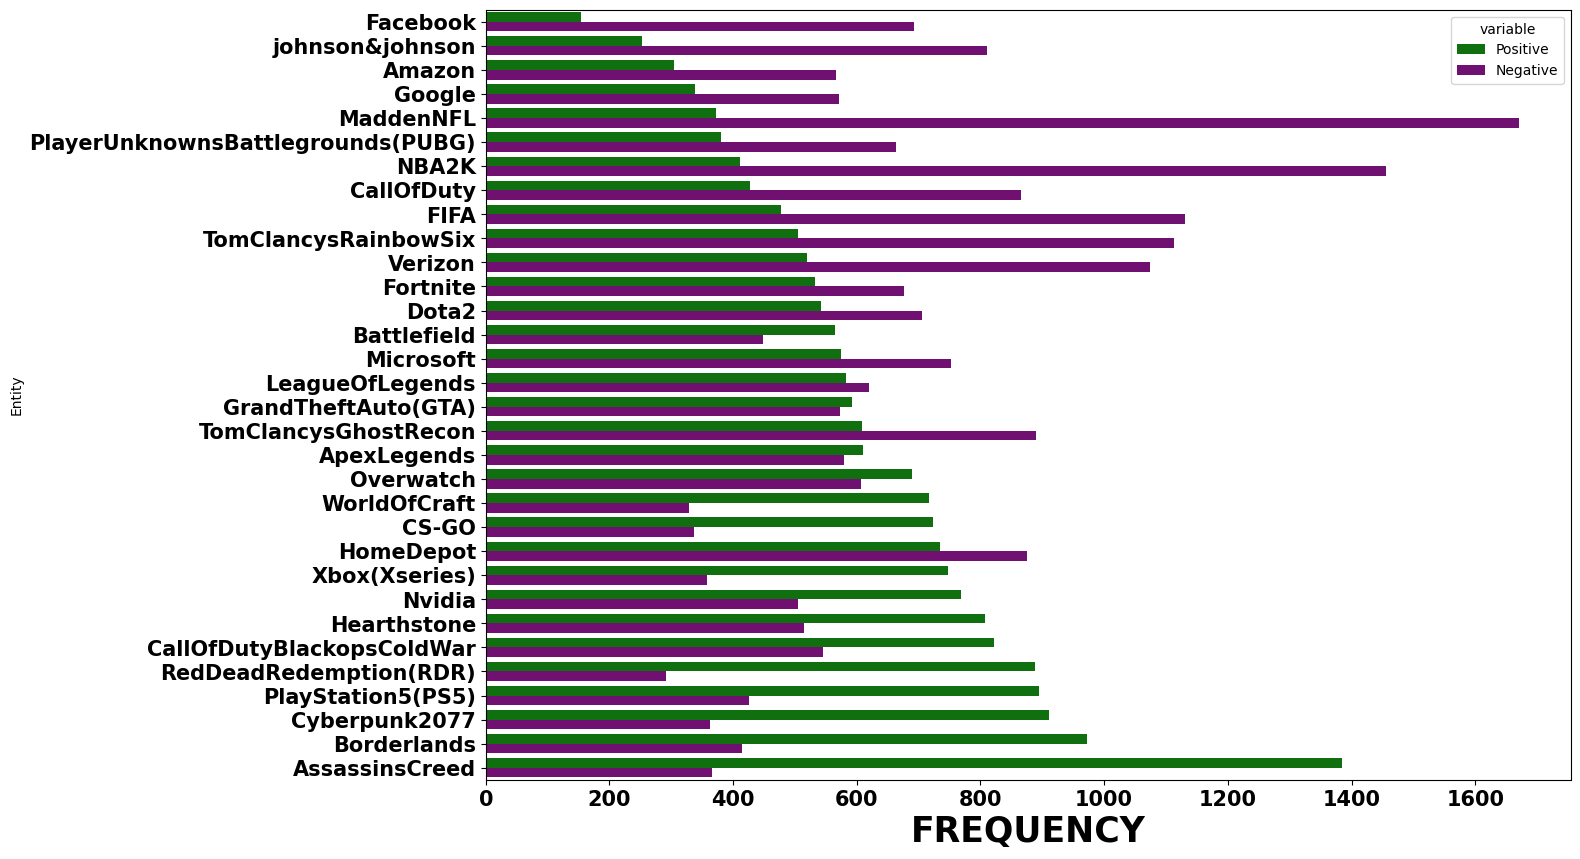

In [38]:
plt.figure(figsize=(14, 10))

# Sort the DataFrame by positive values in ascending order
Entityy_sorted = Entity_Sentiment.sort_values(by='Positive')

# Melt the DataFrame to make it suitable for Seaborn's bar plot
entityy_melted = pd.melt(Entityy_sorted, id_vars=['Entity'], value_vars=['Positive', 'Negative'])

# Create a horizontal grouped bar plot
sns.barplot(x='value', y='Entity', hue='variable', data=entityy_melted, orient='h', palette={'Positive': 'green', 'Negative': 'purple'})

plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.xlabel("FREQUENCY", fontsize=25, fontweight='bold')
plt


In [43]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 393.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 751.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 654.9 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 756.6 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 734.2 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 919.0 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 842.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
